In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(1)
x_1 = np.repeat(1, 30)
x_2 = np.linspace(0, 2, 30)

X = np.array([x_1, x_2]).T
betas = np.array([5, -2])
y = X.dot(betas) + np.random.randn(30)

model = LinearRegression(fit_intercept=False)
model.fit(X, y)
print(model.score(X, y))
print(mean_squared_error(y, model.predict(X)))
print(model.coef_)

0.5635792054243238
1.0159652439704256
[ 4.85891966 -1.91885858]


In [3]:
delta = 0.05
grid_beta0 = np.arange(-24.5, 21.5, delta)
grid_beta1 = np.arange(-21, 20.0, delta)
grid_bbeta0, grid_bbeta1 = np.meshgrid(grid_beta0, grid_beta1)

y_sq = y.dot(y)
Xy = X.T.dot(y)
XTX = X.T.dot(X)
beta_vector = np.array([grid_bbeta0, grid_bbeta1])

beta_xy = sum(beta_vector[i, :, :]*Xy[i] for i in range(2))

beta_sq = sum(XTX[i, i]*beta_vector[i, :, :]**2 for i in range(2))

L = 1./len(y)*(y_sq + beta_xy + beta_sq)

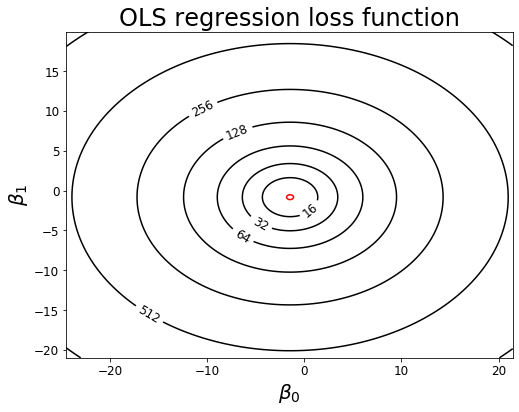

In [4]:
plt.figure(figsize=(8, 6))
CS = plt.contour(grid_bbeta0, grid_bbeta1, L,
                 levels=np.logspace(3, 10, 8, base=2),
                 colors=['r', 'k']+['k']*7)
plt.clabel(CS, inline=2, fontsize=12, fmt='%1.0f',)
plt.title(r'OLS regression loss function', fontsize=24)
plt.xlabel(r'$\beta_0$', fontsize=20)
plt.ylabel(r'$\beta_1$', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

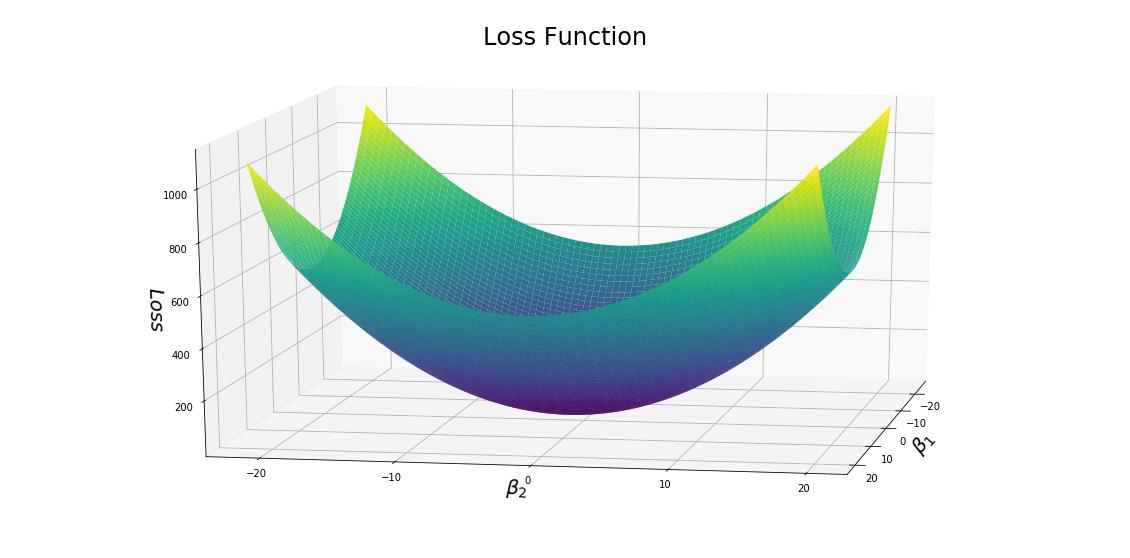

In [5]:
fig, ax = plt.subplots(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.plot_surface(grid_bbeta0, grid_bbeta1, L, rstride=10, cstride=10,
                cmap='viridis', edgecolor='none')
ax.set_title(r'Loss Function', fontsize=24)
ax.set_xlabel(r'$\beta_1$', fontsize = 20)
ax.set_ylabel(r'$\beta_2$', fontsize = 20)
ax.set_zlabel(r'$Loss$', fontsize = 20)
ax.view_init(15, 10) #(x-y plane, z-axis) change this to view the loss function at a different angle
fig;